# <center> Présentation AFE x CGénial : L'apprentissage automatisé<center>

Bonjour ! Aujourd'hui, nous allons vous montrer comment faire du machine learning de façon simple avec la librairie AutoGluon. Dans cet exemple, nous allons estimer si la personne pourra acheter le produit proposé en publicité sur les réseaux sociaux.

Il s'agit d'un apprentissage supervisé avec des données de type tabulaire.

## 1 - Installation des librairies

Une librairie est une bibliothèque d'outils qui permet à l'utilisateur d'étendre les fonctionnalités possibles à son code.

Plus d'informations ici : https://docs.python.org/fr/3/library/index.html

Les librairies ci-dessous sont nécessaires pour notre algorithme. Le point d'exclamation au début de la ligne de commande permet d'exécuter cette ligne de commande dans le terminal de l'ordinateur. 
<br>Nous allons tout d'abord les installer : 

In [76]:
# Uninstall mkl for faster neural-network training time
!pip uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip install -U setuptools
!pip install -U "mxnet<2.0.0"
# Install pre-release, frozen to a particual pre-release for stability
!pip install autogluon
!pip install -U ipykernel

## 2 - Importation des librairies

Il faut maintenant importer les librairies dans notre environnement. Voici la ligne de commande pour importer la librairie autogluon. <br>

Ci dessous, vous pouvez trouver une explication de la fonctionnalité de chaque librairie : <br> 

**AutoGluon** nous permet d'utiliser de façon simple le machine learning : https://auto.gluon.ai/stable/index.html
<br>**Sklearn** (Scikit-Learn) apporte des fonctionnalités pour analyser notre donnée : https://scikit-learn.org/stable/
<br>**Matplotlib** est également un outil de visualisation de données : https://matplotlib.org/
<br>**Seaborn** est un package pour la visualisation de nos données. Cette librairie est plus poussée que Matplotlib. : https://seaborn.pydata.org/
<br>**Requests** est un package qui permet de lancer des requêtes HTTP : https://fr.python-requests.org/en/latest/

In [77]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## 3 - Import de la donnée sur notre ordinateur

Deux possibilités existent pour importer la donnée : Soit elle n'est pas au même endroit que le fichier où vous écrivez et il faut aller récupérer ce fichier via une requête sur Internet (ici Github). Sinon, il suffit de passer à l'étape 4.


In [78]:
url = 'https://raw.githubusercontent.com/khallydi/AFExCGenial/main/Social_Network_Ads.csv'
r = requests.get(url, allow_redirects=True)

open('Social_Network_Ads.csv', 'wb').write(r.content)

10525

## 4 - Import de la donnée dans mon notebook

Nous allons chercher le dataset sur notre ordinateur.
<br>**data = TabularDataset('Social_Network_Ads.csv')**
<br><br>

In [79]:
data = TabularDataset('Social_Network_Ads.csv')

Loaded data from: Social_Network_Ads.csv | Columns = 5 / 5 | Rows = 400 -> 400


Affichons désormais une partie du dataset

In [80]:
data.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Mon dataset contient 5 colonnes : l'ID de l'utilisateur, le genre de la personne, l'âge, le salaire et si la personne va acheter ou non.

 ## Analyse et visualisation de la donnée

Pour comprendre que contiennent mes données, nous allons l'analyser. Nous allons tout d'abord regarder le type des colonnes de mon dataset : 

In [81]:
data.dtypes

UserID              int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

A droite, vous pourrez retrouver le structure de chaque colonne. Le type int64 est un nombre sur 8 octets de (-9,223,372,036,854,775,808 à +9,223,372,036,854,775,807).
<br>Le type object est peut être assigné à tout type de variable (nombre, chiffre, lettres...)

### a) Valeurs non nulles

In [82]:
data.isnull().sum()

UserID             0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Aucune valeur nulle. Nous pouvons continuer.

### b) Types des données

Notre variable Purchased est de type int64 alors que nous souhaitons un booléen (https://fr.wikipedia.org/wiki/Bool%C3%A9en). Faisons les modifications de variables dans le tableau et vérifions ensuite : 

In [83]:
data.Purchased = data.Purchased.astype('bool') #Changement de type
data.dtypes #Vérification

UserID              int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased            bool
dtype: object

In [84]:
data.UserID = data.UserID.astype('string') #Changement de type
data.dtypes #Vérification

UserID             string
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased            bool
dtype: object

### c) Analyse des données de manière générale

Allons plus en profondeur dans l'analyse des données : 

In [85]:
data.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


Nous pouvons retrouver que l'âge moyen est de 37.65 soit 38 ans et que le salaire moyen est de 69742.5 dollars.

Faisons le de manière graphique pour chaque colonne : 

### d) La répartition des âges 

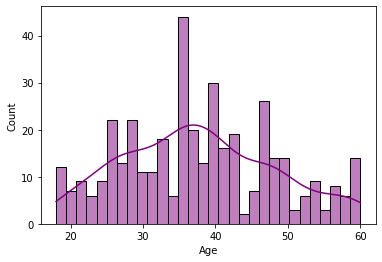

In [86]:
sns.histplot(data['Age'],kde=True,color='purple',bins=30)

L'âge des personnes est assez hétérogène.

### e) La répartition des salaires 

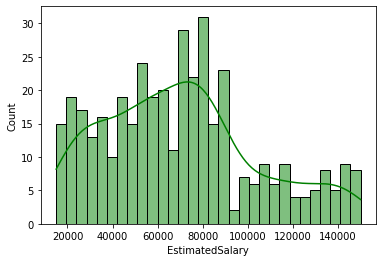

In [87]:
sns.histplot(data['EstimatedSalary'],kde=True,color='green',bins=30)

La plupart des salaires sont inférieurs à 80000$.

### f) La proportion d'hommes et de femmes

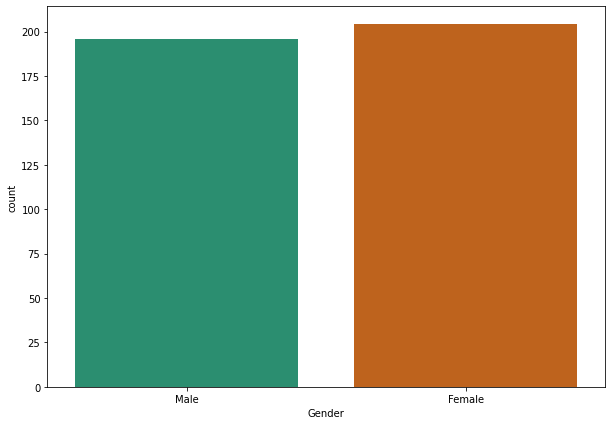

In [88]:
plt.figure(figsize=(10, 7))
sns.countplot(x = "Gender",data=data, palette="Dark2")
plt.show()

Le dataset est constitué de presque autant de femmes et d'hommes.

### g) La répartition des achats ou non (Colonne "Purchased")

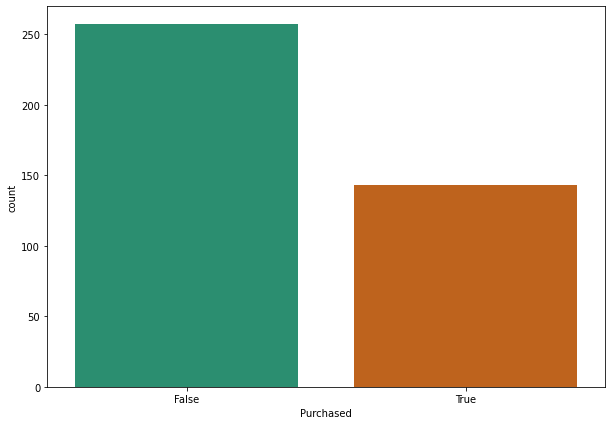

In [89]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Purchased",data=data, palette="Dark2")
plt.show()

Dans nos données, nous avons une représentation plus importante de personnes qui n'ont pas achetés le produit en publicité.

### h) Bonus : La répartition des personnes qui ont achetés ou non selon leur genre

<Figure size 720x216 with 0 Axes>

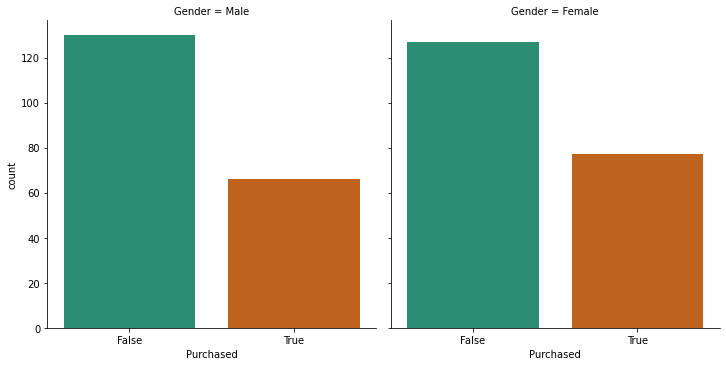

In [90]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Purchased', col='Gender', kind='count', data=data,palette="Dark2");
plt.show()

Le genre de la personne n'a pas l'air d'influencer l'achat du produit.

## 5 - Création des ensembles de données d'entraînement et de test

Maintenant que j'ai compris ce que contenait mes données, je vais commencer le travail préparatoire.
Pour le modèle d'apprentissage automatisé, il faut avoit deux datasets (ensemble de données). Un pour entrainer le modèle et un pour tester le modèle. Généralement, nous prenons 80% de la donnée pour l'entrainement et 20% de la donnée pour le test.


Nous allons séparer les données en deux ensembles de données :
<br> **entrainement, test = train_test_split(data,test_size = 0.20,random_state=56)** 
<br><br>
Nous allons voir la taille du dataset et voir si le dataset principal a bien été séparé : 
<br><br>**print("La taille de mon dataset total : ",data.size)**
<br><br>**print("La taille de mon dataset d'entraînement : ", entrainement.size)**
<br><br>**print("La taille de mon dataset de test : ", test.size)**



In [91]:
entrainement, test = train_test_split(data,test_size = 0.20,random_state=56)

In [92]:
print("La taille de mon dataset total : ",data.size)
print("La taille de mon dataset d'entraînement : ", entrainement.size)
print("La taille de mon dataset de test : ", test.size)

La taille de mon dataset total :  2000
La taille de mon dataset d'entraînement :  1600
La taille de mon dataset de test :  400


## 6 - Lancement de l'algorithme

Nous allons tout d'abord spécifier la colonne target, ce que nous cherchons à estimer. Dans notre cas, il s'agit de la colonne "Purchased".

In [93]:
label = 'Purchased'
print("Summary of class variable: \n", entrainement[label].describe())

Summary of class variable: 
 count       320
unique        2
top       False
freq        205
Name: Purchased, dtype: object


Nous allons pouvoir entrainer notre modèle et le sauvegarder dans un dossier à spécifier : 

In [94]:
save_path = 'agModels-predictClass'  # Spécifier un dossier pour créer le modèle de machine learning
predictor = TabularPredictor(label=label, path=save_path).fit(entrainement)

Cannot interpret 'StringDtype' as a data type
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass/"
AutoGluon Version:  0.3.2b20211111
Python Version:     3.6.13
Operating System:   Linux
Train Data Rows:    320
Train Data Columns: 4
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [False, True]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Cannot interpret 'StringDtype' as a data type
	Available Memory:                    3017.79 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on colum

## 7 - Testons notre algorithme d'apprentissage supervisé

Nous allons maintenant tester notre algorithme et mettre la valeur à prédire de côté. Nous allons créer un autre ensemble de données en enlevant cette valeur.

In [95]:
y_test = test[label]  #Mettons la valeur à prédire de côté
test_data_nolab = test.drop(columns=[label]) #drop = enlever
test_data_nolab.head()

,UserID,Gender,Age,EstimatedSalary
79,15655123,Female,26,17000
112,15619653,Male,38,61000
164,15697574,Female,33,69000
185,15814816,Male,31,66000
180,15685576,Male,26,16000


Nous avons désormais 4 colonnes puisque nous avons enlevé la colonne "Purchased". Demandons maintenant au modèle d'apprentissage automatisé de nous prédire si les personnes vont achetés au non le produit de la publicité.

In [96]:
predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)

Regardons plus en détail les prédictions et comparons avec les vrais résultats :

In [97]:
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.875
Evaluations on test data:
{
    "accuracy": 0.875,
    "balanced_accuracy": 0.8461538461538461,
    "mcc": 0.7205766921228921,
    "f1": 0.8076923076923077,
    "precision": 0.875,
    "recall": 0.75
}


Predictions:  
 79     False
112    False
164    False
185    False
180    False
       ...  
71     False
130    False
243     True
127    False
44     False
Name: Purchased, Length: 80, dtype: bool


Notre modèle a une précision d'environ 87% (ce qui est très bien pour un modèle). 

## 8 - Testons pour une personne

In [102]:
UserID = "86784909" 
Gender = "Femme"
Age = 60
EstimatedSalary = 90000

personne = {'UserID': [UserID], 'Gender': [Gender], 'Age': [Age],'EstimatedSalary': [EstimatedSalary]}
personne_tab =  TabularDataset(personne)

In [103]:
predictor.predict(personne_tab)

0    True
Name: Purchased, dtype: bool

### Quel algorithme a été le plus performant ?

Autogluon nous a permis de lancer plein d'algorithmes. Nous allons pouvoir voir quelques statistiques tel que la performanc,e le temps d'entraînement...

In [100]:
predictor.leaderboard(test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.9000,0.906250,0.001991,0.001363,0.105747,0.001991,0.001363,0.105747,1,True,7
1,LightGBMXT,0.9000,0.906250,0.004929,0.003217,0.287560,0.004929,0.003217,0.287560,1,True,3
2,XGBoost,0.9000,0.906250,0.019023,0.004627,0.086817,0.019023,0.004627,0.086817,1,True,11
3,NeuralNetFastAI,0.9000,0.921875,0.027075,0.017164,1.972930,0.027075,0.017164,1.972930,1,True,10
4,ExtraTreesEntr,0.8875,0.890625,0.115443,0.102876,0.643029,0.115443,0.102876,0.643029,1,True,9
5,ExtraTreesGini,0.8875,0.890625,0.115758,0.102851,0.645141,0.115758,0.102851,0.645141,1,True,8
6,LightGBMLarge,0.8750,0.906250,0.004851,0.003281,0.358842,0.004851,0.003281,0.358842,1,True,13
7,LightGBM,0.8750,0.937500,0.005643,0.003216,0.295833,0.005643,0.003216,0.295833,1,True,4
8,WeightedEnsemble_L2,0.8750,0.937500,0.008775,0.003906,0.739433,0.003133,0.000690,0.443600,2,True,14
9,RandomForestGini,0.8625,0.906250,0.115008,0.102928,0.649401,0.115008,0.102928,0.649401,1,True,5


Ce code peut être réutilisé pour d'autres données tabulaires !